# Module 3 Peer Review Assignment

# Problem 1

You work at a factory that manufactures light bulbs. You have determined that $5\%$ of light bulbs that are produced are defective. For each of the scenarios below:

1. Define an appropriate random variable and distribution.
2. State the values that the random variable can take on.
3. State any assumptions that you need to make.
4. Find the probability that the random variable you defined takes on the value $X=4$.

**Part a)**

Out of 30 lightbulbs, $k$ are defective.

1) Binomial Random Variable

2) k, the number of defective bulbs found, can be 0 to 30

3) There are only two possible outcomes. Each bulb has probability of being defective of 0.05. Each bulb is independent of the others.

4) 0.0451

In [9]:
n = 30
k = 4
p = 0.05

# Calculate the probability of finding 4 defective bulbs out of 30
choose(30, k)*(p^k)*((1-p)^(n-k))

[1] 0.04513605

**Part b)**

You test each lightbulb as it comes of the line. The $k^{th}$ light bulb is defective.

1) Geometric Series

2) k can be 1 through infinity (unbounded).

3) There are only two possible outcomes. Each bulb is independent of the others (i.e. no batches of defective bulbs) and has an equal probability of being defective. Bulbs will be checked until a defective bulb is found.

4) 0.0429

In [5]:
k = 4
p = 0.05

((1-p)^(k-1))*p

[1] 0.04286875

**Part c)**

You find your second defective drive after observing $k$ drives in all.

1) Negative Binomial

2) k can be 2 through infinity (unbounded).

3) There are only two possible outcomes. Each bulb is independent of the others (i.e. no batches of defective bulbs) and has an equal probability of being defective. 

4) 0.0002078 # or 2.078 *10^-5

In [10]:
n = 2
k = 4
p = 0.05

choose(k-1,n)*(p^k)*((1-p)^(n-k))

[1] 2.077562e-05

# Problem 2

Consider a loaded six-sided die that is twice as likely to roll an even number as an odd number. Let $X$ be random variable for value that is rolled from the die.

**Part a)**

What is the Probability Mass Function for $X$. Write this out as a table.

| Number | Probability |
| --- | --- |
|1| 0.1111 |
|2| 0.2222|
|3| 0.1111 |
|4| 0.2222|
|5| 0.1111 |
|6| 0.2222 |


**Part b)**

What is the Cumulative Distribution Function for $X$?

| Number | Cumulative Probability |
| --- | --- |
|1| 0.1111 |
|2| 0.3333|
|3| 0.4444 |
|4| 0.6666|
|5| 0.77777 |
|6| 1 |

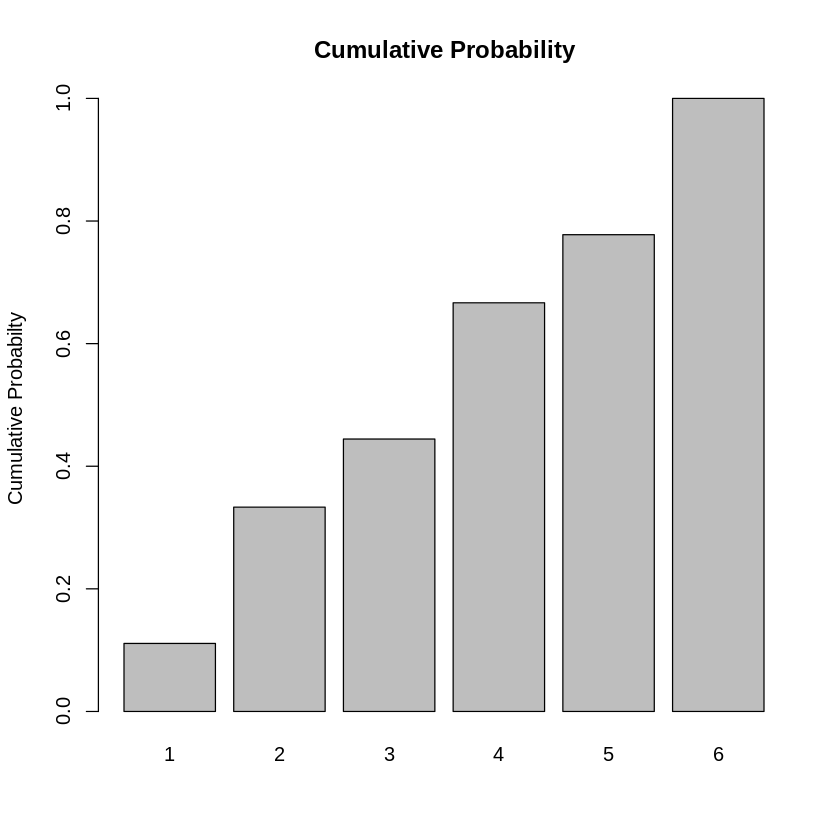

In [22]:
barplot(c(0.111, 0.3333, 0.4444, 0.6666, 0.7777, 1), names.arg = c(1,2,3,4,5,6), ylab = 'Cumulative Probabilty', main = 'Cumulative Probability')

**Part c)** 

What is $E[X]$?

E[X] = The sum of all probabilities * their possible values

E[X] = 3.667

# Problem 3

How would we simulate variables from these distributions in R? It'll turn out that the method is fairly similar across all these distributions so, for simplicity, let's just say we want to simulate $X \sim Bin(n,p)$. Take a look at the official documentation for this function [here](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial). Not extremely clear, is it? Let's go through it one step at a time.

**Part a)** 

What if we want a random variable from this distribution? That is, we know some underlying distribution and we want to simulate many results from that distribution. Then we would use the "random generation" function `rbinom()`.

Play around with this function, with different `size` and `prob` parameters to get a feel for how it works. Finally, generate $30$ results from a $Bin(10, 0.3)$ distribution and plot a histogram of the results.

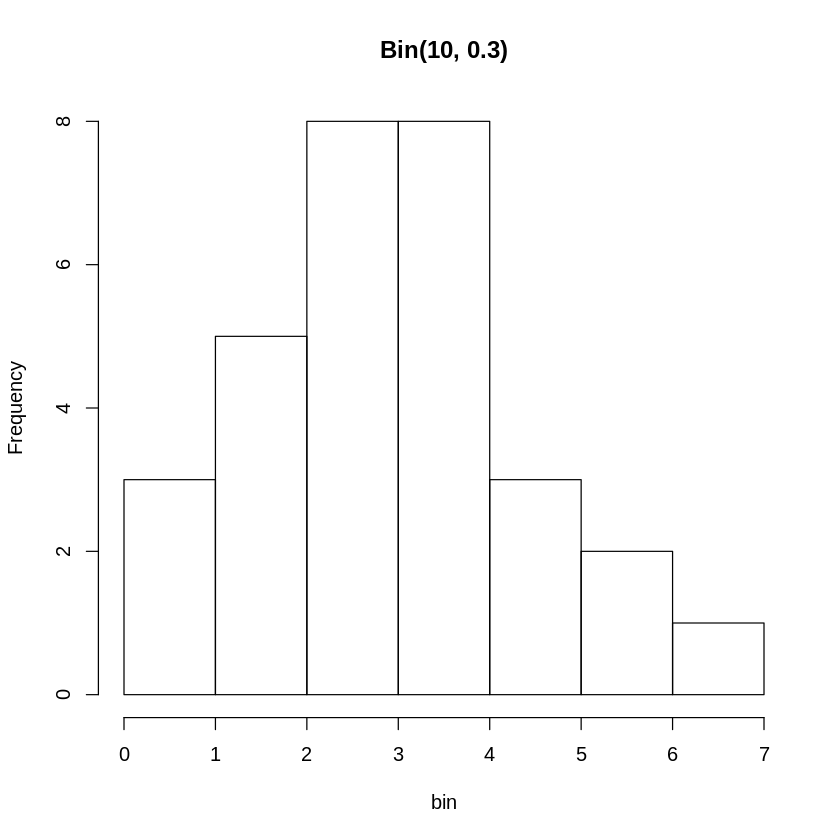

In [49]:
bin = rbinom(n=30, size=10, prob=0.3)
hist(bin, main='Bin(10, 0.3)')

**Part b)**

What if we have some value $k$ and we want to know what's probability of generating $k$? That is, we're solving the Probability Mass Function $P(X=k)$. Then we would use the "density" function `dbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X=4)$. Then use the `dbinom()` function to confirm your result.

In [56]:
# YOUR CODE HERE
by_hand = choose(15, 4)*(0.4^4)*(0.6^11)
print(by_hand)

# using dbinom
dbinom(x=4, size=15, prob=0.4)

[1] 0.1267758


[1] 0.1267758

**Part c)**

What if we wanted to solve for some value of the Cumulative Density Function? That is, we know $k$ and want to find $P(X \le k) = p$. Then we would use the "distribution function" `pbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X \le 4)$. Then use the `qbinom()` function to confirm your result.

In [60]:
by_hand_0 = 0.6^15
by_hand_1 = (15*0.4)*(0.6^14)
by_hand_2 = choose(15, 2)*(0.4^2)*(0.6^13)
by_hand_3 = choose(15, 3)*(0.4^3)*(0.6^12)
by_hand_4 = choose(15, 4)*(0.4^4)*(0.6^11)

by_hand = by_hand_0 + by_hand_1 + by_hand_2 + by_hand_3 + by_hand_4
print(by_hand)

# YOUR CODE HERE
pbinom(q=4, size = 15, prob=0.4)

[1] 0.2172777


[1] 0.2172777

**Part d)**

Finally, we have the "quantile" function `qbinom()`. This function is the reverse of the `pbinom()` function, in that it takes a probability $p$ as an argument and returns the value $k$ of the CDF that results in that much probability.

Use the `qbinom()` function to confirm your results from **Part c**. That is, plug in the probablity you got from **Part c** and see if you get the same $k$.

In [70]:
# YOUR CODE HERE
qbinom(p=0.21722, size=15, prob=0.4)

[1] 4

Nearly every distribution has these four functions, and they will be very useful for our future calculations and simulations.